Merge de los archivos

In [1]:
# Importar archivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

df_demograficos = pd.read_csv("../files/datosdemograficos_limpio.csv", sep=',', decimal='.')
df_perfomance = pd.read_csv("../files/performancelimpio.csv", sep=',', decimal='.')
df_previous = pd.read_csv("../files/previous_loan_limpio.csv", sep=',', decimal='.')

In [2]:
# lo he hecho en 2 pasos porq en 1 daba error. https://stackoverflow.com/questions/54930427/valueerror-while-doing-merge-with-dataframes-using-pandas
df = pd.merge(df_demograficos, df_perfomance,on='customerid')
df = pd.merge(df, df_previous,on='customerid')
df

,customerid,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,...,loanamount,totaldue,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious
0,8a858e135cb22031015cbafc76964ebd,48,0,1,0,0,0,0,0,1,...,100000000,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,115000000.0,15.0,3667.000000
1,8a858e275c7ea5ec015c82482d7c3996,36,0,1,0,0,0,0,0,0,...,100000000,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,130000000.0,30.0,3668.000000
2,8a858e5b5bd99460015bdc95cd485634,35,0,1,0,0,0,1,0,0,...,100000000,130000000.0,30,30000000.0,23.076923,2.0,100000000.0,120000000.0,20.0,3611.666667
3,8a858efd5ca70688015cabd1f1e94b55,30,0,1,0,0,0,0,0,1,...,100000000,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3668.000000
4,8a858e785acd3412015acd48f4920d04,39,0,1,0,0,0,0,0,1,...,20000,22250.0,15,2250.0,10.112360,3.0,120000000.0,135750000.0,15.0,3631.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,8a858fc25bafabdc015bb47fda0323e5,46,0,1,0,0,0,0,0,1,...,200000000,222500000.0,15,22500000.0,10.112360,2.0,100000000.0,120000000.0,20.0,3608.666667
5812,8a858e245c214660015c3397e4db389a,31,0,1,0,0,0,0,0,1,...,100000000,115000000.0,15,15000000.0,13.043478,1.5,100000000.0,115000000.0,15.0,3637.500000
5813,8a858e8b5bc9e7e6015bcd7374077f0c,33,0,1,0,0,0,0,1,0,...,100000000,130000000.0,30,30000000.0,23.076923,1.5,100000000.0,130000000.0,30.0,5161.500000
5814,8a858f2e5c699f3a015c77aa22ed7f23,48,0,1,0,0,1,0,0,0,...,100000000,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3614.000000


In [3]:
df.drop(['customerid'], axis=1, inplace = True)

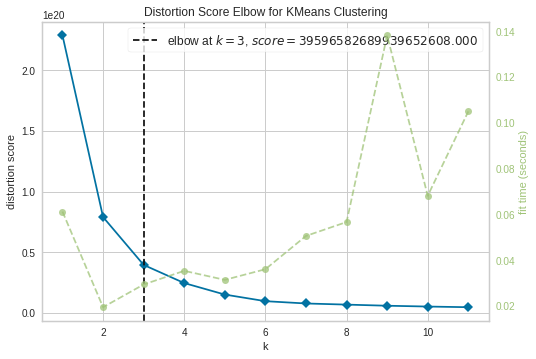

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [6]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 2543, 0: 1446, 3: 1378, 1: 449})

In [16]:
df['index'] = df.index
df

,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,Heritage Bank,...,totaldue,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious,index
0,48,0,1,0,0,0,0,0,1,0,...,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,115000000.0,15.0,3667.000000,0
1,36,0,1,0,0,0,0,0,0,0,...,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,130000000.0,30.0,3668.000000,1
2,35,0,1,0,0,0,1,0,0,0,...,130000000.0,30,30000000.0,23.076923,2.0,100000000.0,120000000.0,20.0,3611.666667,2
3,30,0,1,0,0,0,0,0,1,0,...,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3668.000000,3
4,39,0,1,0,0,0,0,0,1,0,...,22250.0,15,2250.0,10.112360,3.0,120000000.0,135750000.0,15.0,3631.600000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,46,0,1,0,0,0,0,0,1,0,...,222500000.0,15,22500000.0,10.112360,2.0,100000000.0,120000000.0,20.0,3608.666667,5811
5812,31,0,1,0,0,0,0,0,1,0,...,115000000.0,15,15000000.0,13.043478,1.5,100000000.0,115000000.0,15.0,3637.500000,5812
5813,33,0,1,0,0,0,0,1,0,0,...,130000000.0,30,30000000.0,23.076923,1.5,100000000.0,130000000.0,30.0,5161.500000,5813
5814,48,0,1,0,0,1,0,0,0,0,...,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3614.000000,5814


In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.factorplot(x='index', y=df.values, data=df, hue=kmeans.labels_)
# plt.show()

## SHILOUTTE SCORE

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df)
    preds = clusterer.predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6306366298361693)
For n_clusters = 3, silhouette score is 0.6535767953656919)
For n_clusters = 4, silhouette score is 0.6830705572177851)
For n_clusters = 5, silhouette score is 0.7353384491299024)
For n_clusters = 6, silhouette score is 0.7624187443511066)
For n_clusters = 7, silhouette score is 0.7652889967793208)
For n_clusters = 8, silhouette score is 0.7592983813950974)
For n_clusters = 9, silhouette score is 0.7490780435141392)


In [20]:
clusters = 7
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(df)
print(kmeans.labels_)

[0 0 0 ... 0 0 3]


In [21]:
df['Cluster']=kmeans.labels_
df.head()

,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,Heritage Bank,...,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious,index,Cluster
0,48,0,1,0,0,0,0,0,1,0,...,30,30000000.0,23.076923,1.0,100000000.0,115000000.0,15.0,3667.000000,0,0
1,36,0,1,0,0,0,0,0,0,0,...,30,30000000.0,23.076923,1.0,100000000.0,130000000.0,30.0,3668.000000,1,0
2,35,0,1,0,0,0,1,0,0,0,...,30,30000000.0,23.076923,2.0,100000000.0,120000000.0,20.0,3611.666667,2,0
3,30,0,1,0,0,0,0,0,1,0,...,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3668.000000,3,0
4,39,0,1,0,0,0,0,0,1,0,...,15,2250.0,10.112360,3.0,120000000.0,135750000.0,15.0,3631.600000,4,2


In [22]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

pca = PCA(n_components=2)
pca.fit(df)
pca_data = pd.DataFrame(pca.transform(df))
pca_data.head()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.91504613 0.08042161]
Cumulative variance explained by 3 principal components: 99.55%


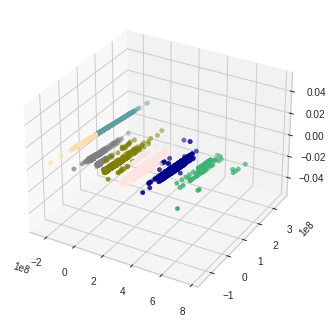

In [23]:
import math

colors = list(zip(*sorted((
					tuple(mcolors.rgb_to_hsv(
						mcolors.to_rgba(color)[:3])), name)
					for name, color in dict(
							mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
													).items())))[1]


# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1],
		c = list(map(lambda label : cluster_colors[label],
											kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, str_label:'', pca_data[0], pca_data[1],
		str_labels))

plt.show()